In [1]:
import pandas as pd

In [2]:
import plotly.express as px

In [4]:
url = "file:///C:/Users/pc/Downloads/StudentsPerformance%20(1).csv"

In [5]:
data = pd.read_csv(url)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [6]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
data.columns = ['gender', 'ethnicity', 'parental_level_of_education','lunch','test_preparation_course','math','reading','writing']
data.columns

Index(['gender', 'ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math', 'reading', 'writing'],
      dtype='object')

In [18]:
writing_data = data.groupby("gender")['writing'].sum().reset_index()

In [19]:
writing_data

,gender,writing
0,female,37538
1,male,30516


In [22]:
writing_data_graph = px.bar(writing_data, x='gender',y='writing')

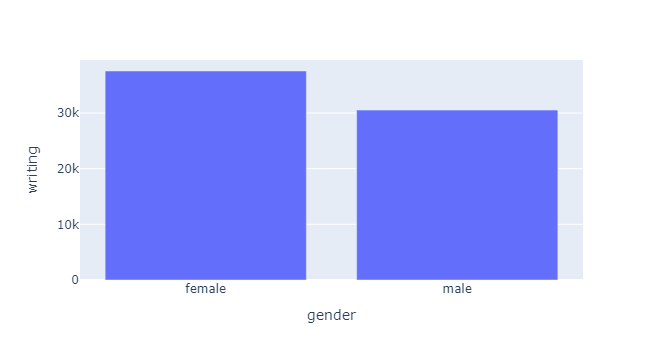

In [23]:
writing_data_graph

In [35]:
data.describe()

,math,reading,writing
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
#reading had the highest mean and lowest standard deviation

In [26]:
print(data.gender.value_counts(),"\n\n",
      data.lunch.value_counts(),"\n\n",
      data.ethnicity.value_counts(),"\n\n",
      data.parental_level_of_education.value_counts(),"\n\n",
      data.test_preparation_course.value_counts(),
     sep='')

gender
female    518
male      482
Name: count, dtype: int64

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

test_preparation_course
none         642
completed    358
Name: count, dtype: int64


In [ ]:
#From what we see at this distribusion of our categorcial coloumn, here some insight we can take of:

#it's quite distribute equally gender wise.
#Most of the students have better quality of lunch,
#Most of parent's don't have very high education level.
#Most of people don't take test preparation course.

In [44]:
gender = pd.crosstab(index = data['gender'],columns='count').reset_index()
gender

col_0,gender,count
0,female,518
1,male,482


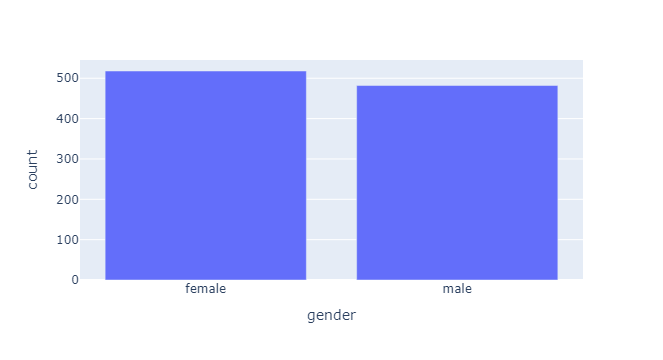

In [51]:
px.bar(gender,x= 'gender',y='count')

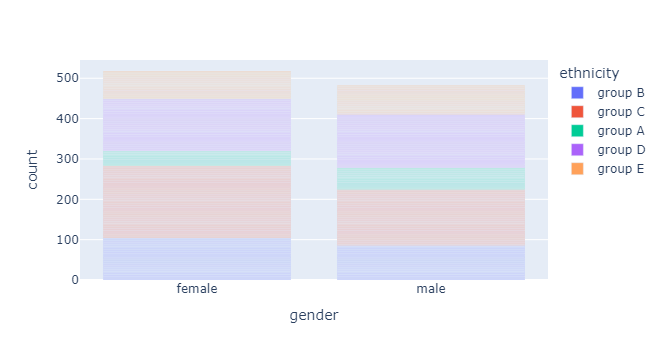

In [57]:
px.bar(data,x='gender',color='ethnicity')

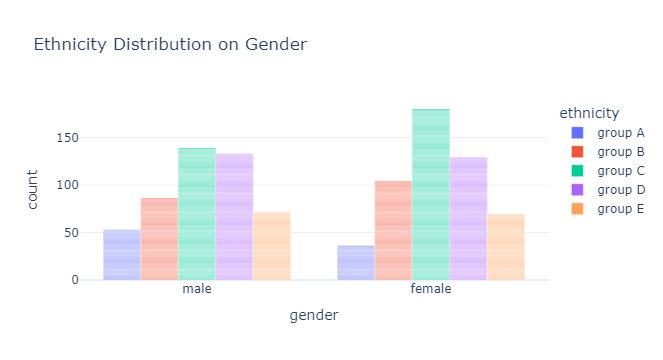

In [58]:
px.bar(data,
             x= 'gender',
             color='ethnicity',
             template='plotly_white', 
             barmode='group',
             category_orders={'ethnicity':["group A","group B","group C","group D","group E"]},
             title= "Ethnicity Distribution on Gender")

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   ethnicity                    1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math                         1000 non-null   int64 
 6   reading                      1000 non-null   int64 
 7   writing                      1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [60]:
data.head()

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [70]:
parental_data = data.groupby('parental_level_of_education')['math'].mean().reset_index()

In [71]:
parental_data

,parental_level_of_education,math
0,associate's degree,67.882883
1,bachelor's degree,69.389831
2,high school,62.137755
3,master's degree,69.745763
4,some college,67.128319
5,some high school,63.497207


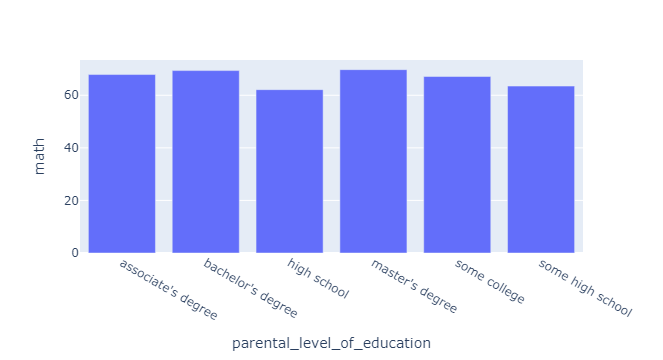

In [72]:
px.bar(parental_data,x='parental_level_of_education',y='math')

In [ ]:
# the parental level of education influences students get a higher score---- 
#in math, the master's degree parents have the highest average on maths 

In [83]:
master= data.groupby('gender')['parental_level_of_education'].value_counts().reset_index()

In [84]:
master

,gender,parental_level_of_education,count
0,female,some college,118
1,female,associate's degree,116
2,female,high school,94
3,female,some high school,91
4,female,bachelor's degree,63
5,female,master's degree,36
6,male,some college,108
7,male,associate's degree,106
8,male,high school,102
9,male,some high school,88


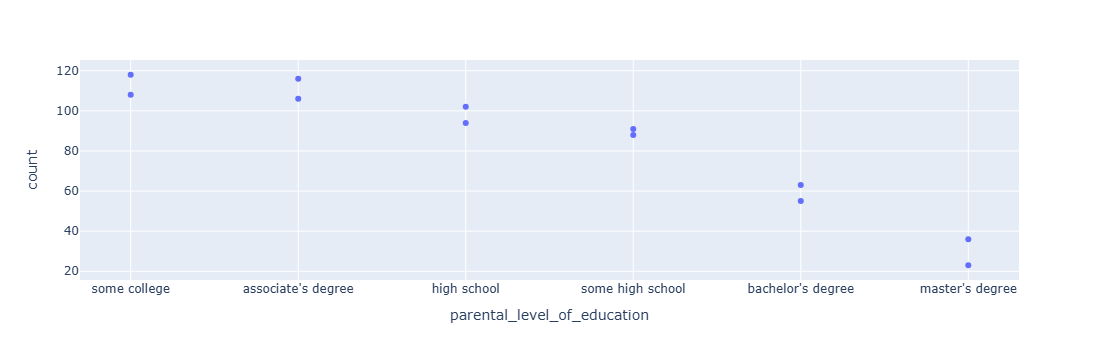

In [89]:
px.scatter(master,x='parental_level_of_education',y='count',hover_data='gender')

In [ ]:
#female has the most master degree parent education level of 36 compared to male

In [90]:
data.head()

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [96]:
lunch_data = data.groupby('lunch')['math'].mean().reset_index()
lunch_data

,lunch,math
0,free/reduced,58.921127
1,standard,70.034109


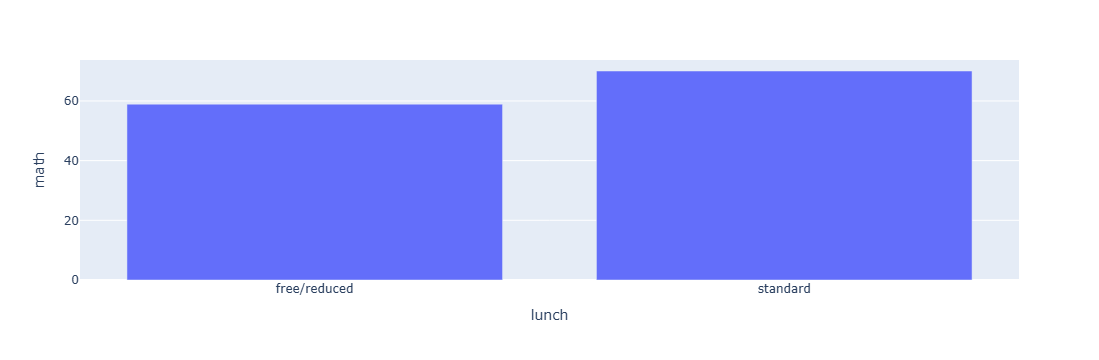

In [100]:
 px.bar(lunch_data, x='lunch',y='math')


In [ ]:
#standard lunch quality influenced students get higher score in math

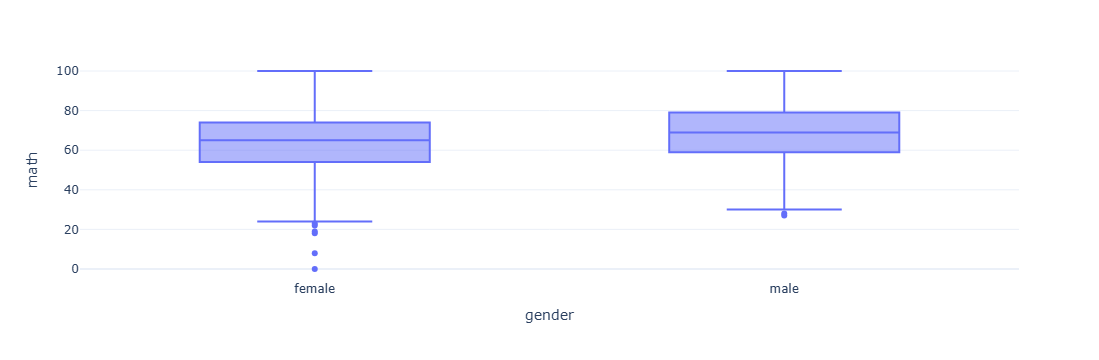

In [101]:
fig = px.box(data,
             x='gender', 
             y='math',
             template='plotly_white')
fig.show()

In [ ]:
#Male have higher median than female, that's the easiest way to see a certain catergory performs better with box plot, just see the median. 

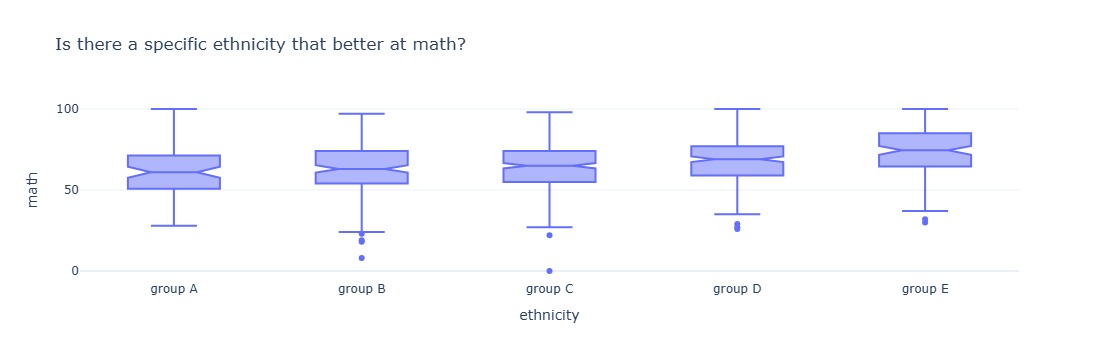

In [103]:

fig = px.box(data,
             x='ethnicity', 
             y='math',
             template='plotly_white', 
             category_orders={'ethnicity':["group A","group B","group C","group D","group E"]},
             title="Is there a specific ethnicity that better at math?",
             notched=True)
fig.show()

In [ ]:

#There is a quite a lot of insight that we can take from box plot, like if there is much outlier in data, or how is the variance of the data. The point outside the whisker is an ourlier, while we can see how our data variance from how is the size of the box, if it longer then it have bigger variance. But we don't need that for answering our question, we just need to see where the median is to answer our question.

#As we can see a certain ethnicity group is having much higher median, so it's save to assume, yes a specific ethnicity that better at math.